In [93]:
import numpy as np
import pandas as pd
from venn import venn
import plotly.express as px

In [4]:
cfc = pd.read_csv("../data/processed/CorrectedMyNorms/mynorm_ALL.csv", index_col=0)

In [5]:
cf = pd.read_csv("../data/interim/ALL/myNorm.csv", index_col=0)

In [6]:
diff = cfc - cf

In [9]:
diff = diff.abs().mean(axis=1)

In [112]:
diff

cg07881041    0.004160
cg03513874    0.002638
cg05451842    0.001417
cg14797042    0.001337
cg09838562    0.002587
                ...   
cg19812938    0.003300
cg06272054    0.001321
cg07255356    0.001542
cg24220897    0.005423
cg12325588    0.001383
Length: 709071, dtype: float64

In [111]:
perc = sum(diff <= 0.1) / len(diff)
round(perc * 100, 1)

99.8

In [63]:
len(diff) * (1 - perc)

1686.0000000000061

In [80]:
affected_by_correction_cpgs = set(diff[diff > 0.1].index)

In [81]:
# Identfied CpGs CoV vs Healthy

In [84]:
cov_vs_healthy = set(pd.read_csv("../DMGInAllStudiesCorrectedTSS.csv", index_col=0).index)
cov_vs_healthy

{'cg03782202',
 'cg08585897',
 'cg12981595',
 'cg13407664',
 'cg17515347',
 'cg18642567',
 'cg19556901',
 'cg21465162',
 'cg21581312',
 'cg21673175',
 'cg22930808',
 'cg24315703',
 'cg25060243'}

In [85]:
set.intersection(cov_vs_healthy, affected_by_correction_cpgs)

{'cg22930808'}

In [86]:
cov_vs_noncov = set(pd.read_csv("../DMGCoV_vs_nonCoVCorrectedTSS.csv", index_col=0).index)

In [87]:
set.intersection(cov_vs_noncov, affected_by_correction_cpgs)

set()

In [103]:
# Visualisation
poi = pd.read_csv("../data/raw/SampleSheetALL.csv", index_col=0).Sample_Group
poi.value_counts()

Spain               407
USA-Covid-19        102
HB                   83
PL                   32
USA-Non-Covid-19     26
Name: Sample_Group, dtype: int64

In [105]:
df_corrected = cfc.loc["cg22930808"]
df_not_corrected = cf.loc["cg22930808"]
df = pd.concat((df_corrected, df_not_corrected, poi), axis=1)
df.columns = ["Corrected", "Not corrected", "POI"]

In [106]:
df

,Corrected,Not corrected,POI
GSM5163416,0.637160,0.541221,Spain
GSM5163665,0.510159,0.679990,Spain
HB_Control_55,0.627493,0.622191,HB
GSM5163545,0.503524,0.605245,Spain
GSM5163399,0.406343,0.231139,Spain
...,...,...,...
GSM5163752,0.399153,0.214830,Spain
GSM5163688,0.604678,0.552432,Spain
GSM5163557,0.558947,0.612258,Spain
GSM5163700,0.400886,0.639367,Spain


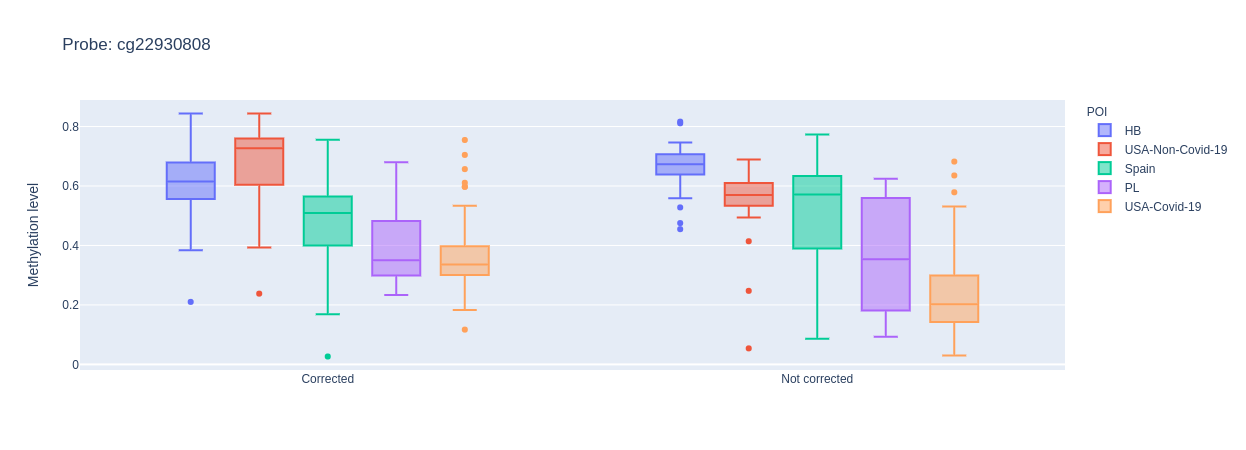

In [110]:
px.box(df, color="POI", title="Probe: cg22930808", category_orders={"POI": ["HB", "USA-Non-Covid-19", "Spain", "PL", "USA-Covid-19"]}, labels={"value": "Methylation level",
                                                                                                                                               "variable": ""})